In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle
import explore
from acquire import get_telco_data
from prepare import prep_telco

In [2]:
df = get_telco_data()

Using cached data


In [3]:
df = prep_telco(df)

In [4]:
train, validate, test = wrangle.split_data(df)

Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


In [5]:
numerics = ['tenure','monthly_charges','total_charges']

In [6]:
train[numerics]

,tenure,monthly_charges,total_charges
5402,2,46.05,80.35
2877,5,85.30,424.15
660,61,106.20,6375.20
5842,60,79.00,4801.10
2230,9,75.85,647.50
...,...,...,...
3201,35,75.20,2576.20
4247,48,73.85,3581.40
2518,3,80.40,224.05
6236,59,19.35,1099.60


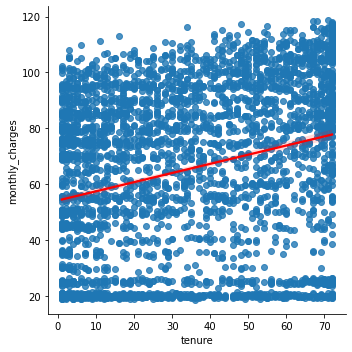

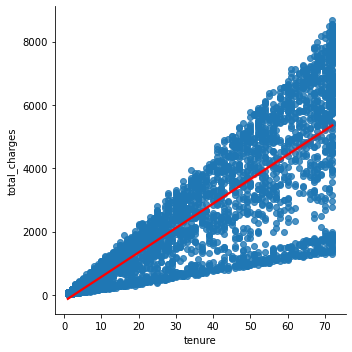

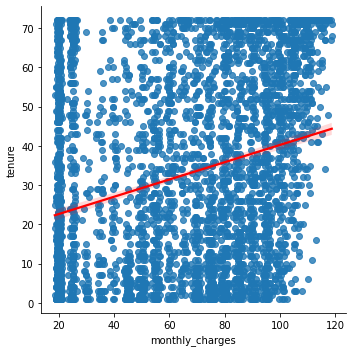

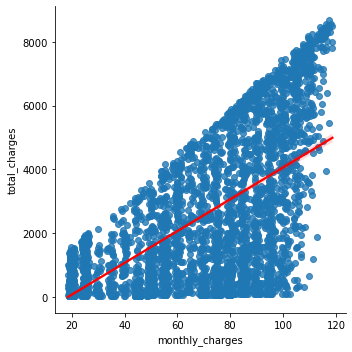

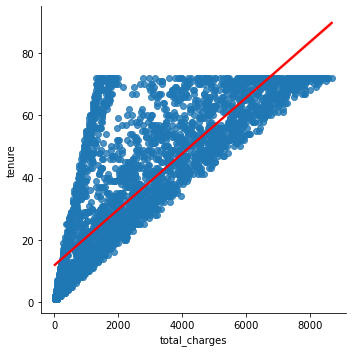

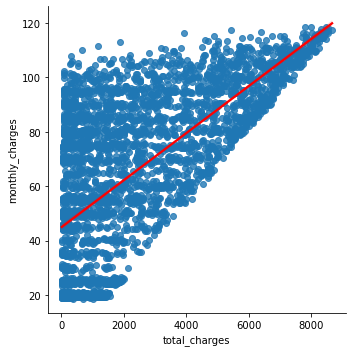

In [7]:
for col in numerics:
    for y in numerics:
        if y == col:
            continue
        sns.lmplot(data = train[numerics], x=col, y=y, line_kws={'color': 'red'})

In [8]:
train = explore.months_to_years(train)

In [13]:
train.columns

Index(['customer_id', 'is_senior_citizen', 'tenure', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'monthly_charges', 'total_charges',
       'churn', 'contract_type', 'internet_service_type', 'payment_type',
       'is_male', 'has_phone', 'has_internet_service', 'has_partner',
       'has_dependent', 'is_paperless', 'is_month_to_month', 'is_autopay',
       'has_streaming', 'tenure_years'],
      dtype='object')

In [11]:
cat_columns = ['is_senior_citizen','online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies',
       'online_security', 'churn', 'internet_service_type', 'payment_type',
       'is_male', 'has_phone', 'has_internet_service', 'has_partner',
       'has_dependent', 'is_paperless', 'is_month_to_month', 'is_autopay',
       'has_streaming']

Generating plots tenure by streaming_tv


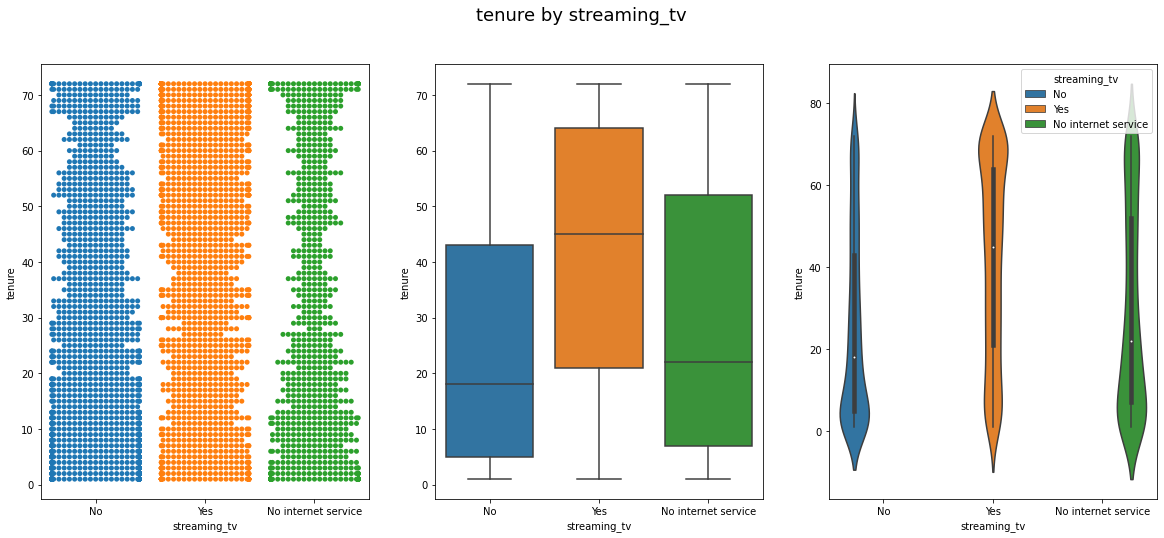

Generating plots monthly_charges by streaming_tv


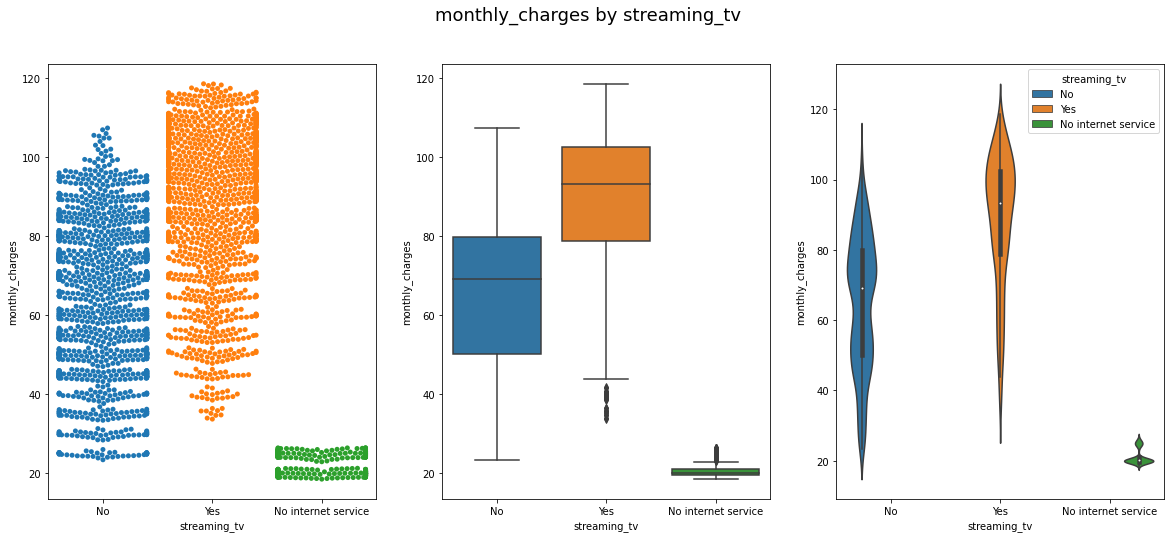

Generating plots total_charges by streaming_tv


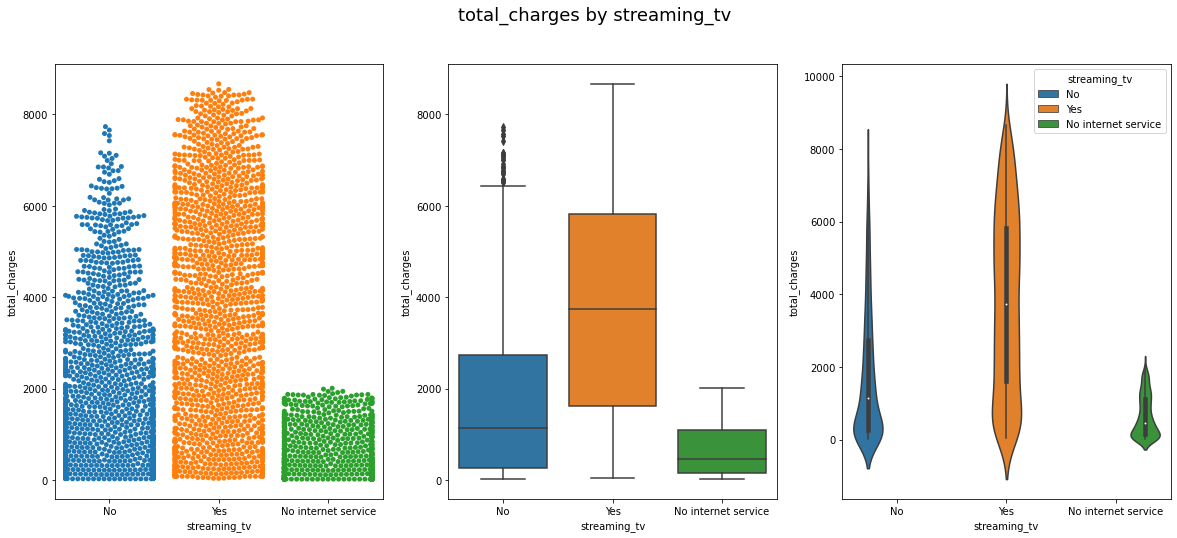

In [12]:
explore.plot_categorical_and_continuous_vars(train, cat_columns[4:7], numerics)